In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("resources/rated_bond_funds.csv")
df.head()

,Name,Ticker,Category,Analyst Rating,Recommend,Fund Age,Fee Level Rank,Star Rating,Fund Size Rank,Est Fund-Level Net Flow 1 Yr Rank,...,Eurozone Crisis June - Sep 2011 Rank,Taper Tantrum May - Aug 2013 Rank,EM LC Sell-Off Sep - Dec 2014 Rank,HY Sell-Off June 2015 - Feb 2016 Rank,IR Shock Aug - Dec 2016 Rank,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return Rank,2009 Return Rank
0,Columbia Floating Rate Inst,CFRZX,US Fund Bank Loan,Neutral,0,9,66.0,4.0,41.0,44.0,...,96.0,7.0,67.0,48.0,41.0,17.0,57.0,71.0,76.0,45.0
1,Credit Suisse Floating Rate Hi Inc Instl,CSHIX,US Fund Bank Loan,Bronze,1,19,25.0,5.0,19.0,82.0,...,27.0,40.0,39.0,46.0,27.0,52.0,22.0,35.0,35.0,10.0
2,Delaware Floating Rate Instl,DDFLX,US Fund Bank Loan,Neutral,0,9,24.0,2.0,78.0,32.0,...,7.0,97.0,42.0,26.0,100.0,19.0,12.0,15.0,50.0,50.0
3,Eaton Vance Floating-Rate & Hi Inc Inst,EIFHX,US Fund Bank Loan,Bronze,1,19,55.0,5.0,33.0,64.0,...,47.0,70.0,44.0,63.0,18.0,22.0,15.0,56.0,82.0,15.0
4,Eaton Vance Floating-Rate Advantage I,EIFAX,US Fund Bank Loan,Bronze,1,11,95.0,5.0,5.0,84.0,...,67.0,30.0,48.0,78.0,9.0,1.0,1.0,90.0,94.0,1.0


In [3]:
target = df["Recommend"]
target_names = ["sell", "buy"]

In [4]:
data = df.drop(["Name", "Ticker", "Category", "Analyst Rating","Recommend"], axis=1)
feature_names = data.columns
data.head()

,Fund Age,Fee Level Rank,Star Rating,Fund Size Rank,Est Fund-Level Net Flow 1 Yr Rank,Est Fund-Level Net Flow 3 Yr Rank,Est Fund-Level Net Flow 5 Yr Rank,Flows % 1 Yr Rank,Longest Manager Tenure Rank,Average Manager Tenure Rank,...,Eurozone Crisis June - Sep 2011 Rank,Taper Tantrum May - Aug 2013 Rank,EM LC Sell-Off Sep - Dec 2014 Rank,HY Sell-Off June 2015 - Feb 2016 Rank,IR Shock Aug - Dec 2016 Rank,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return Rank,2009 Return Rank
0,9,66.0,4.0,41.0,44.0,24.0,53.0,30.0,47,61,...,96.0,7.0,67.0,48.0,41.0,17.0,57.0,71.0,76.0,45.0
1,19,25.0,5.0,19.0,82.0,49.0,14.0,70.0,10,19,...,27.0,40.0,39.0,46.0,27.0,52.0,22.0,35.0,35.0,10.0
2,9,24.0,2.0,78.0,32.0,71.0,61.0,73.0,44,42,...,7.0,97.0,42.0,26.0,100.0,19.0,12.0,15.0,50.0,50.0
3,19,55.0,5.0,33.0,64.0,37.0,72.0,56.0,4,16,...,47.0,70.0,44.0,63.0,18.0,22.0,15.0,56.0,82.0,15.0
4,11,95.0,5.0,5.0,84.0,2.0,20.0,35.0,1,5,...,67.0,30.0,48.0,78.0,9.0,1.0,1.0,90.0,94.0,1.0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf_model = clf.fit(X_train, y_train)
clf_model.score(X_test, y_test)

0.6486486486486487

In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.7702702702702703

In [8]:
sorted(zip(rf_model.feature_importances_, feature_names), reverse=True)

[(0.059938064316338045, 'Fund Size Rank'),
 (0.03382533581003639, 'Est Fund-Level Net Flow 1 Yr Rank'),
 (0.029952964722770852, 'Credit Qual BBB Rank'),
 (0.02967559195060007, 'Fund Age'),
 (0.02893052703584358, 'Fee Level Rank'),
 (0.026642296758212752, 'EM LC Sell-Off Sep - Dec 2014 Rank'),
 (0.026316271941121044, 'Credit Qual AAA Rank'),
 (0.026299612410362477, '3 Yr R2 Rank'),
 (0.025261975019517813, 'HY Equity Sell-Off Oct - Dec 2018 Rank'),
 (0.021624351043290694, 'Est Fund-Level Net Flow 5 Yr Rank'),
 (0.020127498564757422, 'Est Fund-Level Net Flow 3 Yr Rank'),
 (0.01968145296209789, 'Longest Manager Tenure Rank'),
 (0.019012543145000515, '10 Yr R2 Rank'),
 (0.018784923308412683, '5 Yr Max Drawdown Rank'),
 (0.01861512524423406, '15 Yr Return Rank'),
 (0.018325458777862638, 'Corporate Bond Rank'),
 (0.017887512197270333, 'Eff Duration Rank'),
 (0.01773965611211354, 'Average Manager Tenure Rank'),
 (0.017428213641873726, '5 Yr Return Rank'),
 (0.01713501351748117, '# of Holdings 

In [9]:
predictions = rf.predict(X_test)
rf_results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
rf_results.head(10)

,Prediction,Actual
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0


In [12]:
#Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=0)
ab_model = ab.fit(X_train, y_train)
ab_model.score(X_test, y_test)

0.6756756756756757

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
lr_model.score(X_test, y_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6756756756756757

In [13]:
# Multiclass logistic regression
target_multi = df["Analyst Rating"]
X_train, X_test, y_train, y_test = train_test_split(data, target_multi, random_state=42)

lrm = LogisticRegression(random_state=0, multi_class="ovr")
lrm_model = lrm.fit(X_train, y_train)
lrm_model.score(X_test, y_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.47297297297297297

In [15]:
predictions_lrm = lrm.predict(X_test)
lrm_results = pd.DataFrame({"Prediction": predictions_lrm, "Actual": y_test}).reset_index(drop=True)
lrm_results.head(10)

,Prediction,Actual
0,Bronze,Bronze
1,Neutral,Bronze
2,Neutral,Neutral
3,Silver,Silver
4,Gold,Gold
5,Neutral,Neutral
6,Neutral,Bronze
7,Bronze,Neutral
8,Neutral,Neutral
9,Bronze,Neutral


In [16]:
# Random forest on the ratings
rfm = RandomForestClassifier(n_estimators=200)
rfm_model = rfm.fit(X_train, y_train)
rfm_model.score(X_test, y_test)

0.5

In [20]:
predictions_rfm = rfm.predict(X_test)
rfm_results = pd.DataFrame({"Prediction": predictions_rfm, "Actual": y_test}).reset_index(drop=True)
rfm_results.head(100)

,Prediction,Actual
0,Bronze,Bronze
1,Neutral,Bronze
2,Neutral,Neutral
3,Bronze,Silver
4,Silver,Gold
5,Neutral,Neutral
6,Neutral,Bronze
7,Neutral,Neutral
8,Neutral,Neutral
9,Neutral,Neutral


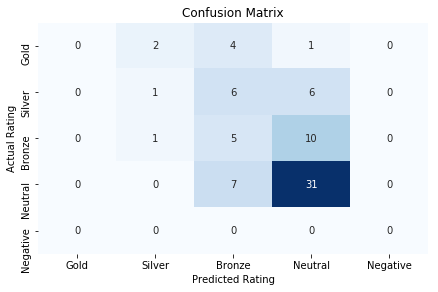

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

ratings_names = ["Gold", "Silver", "Bronze", "Neutral", "Negative"]

# Create confusion matrix
matrix = confusion_matrix(y_test, predictions_rfm, labels=ratings_names)

# Create pandas dataframe
matrix_df = pd.DataFrame(matrix, columns=ratings_names, index=ratings_names)

# Create heatmap
sns.heatmap(matrix_df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Rating"), plt.xlabel("Predicted Rating")
plt.show()